In [125]:
import os
import tarfile

HOUSING_PATH = os.path.join("datasets", "housing")

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [127]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [128]:
housing.info()
housing.describe()
# total_bedrooms has nulls.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

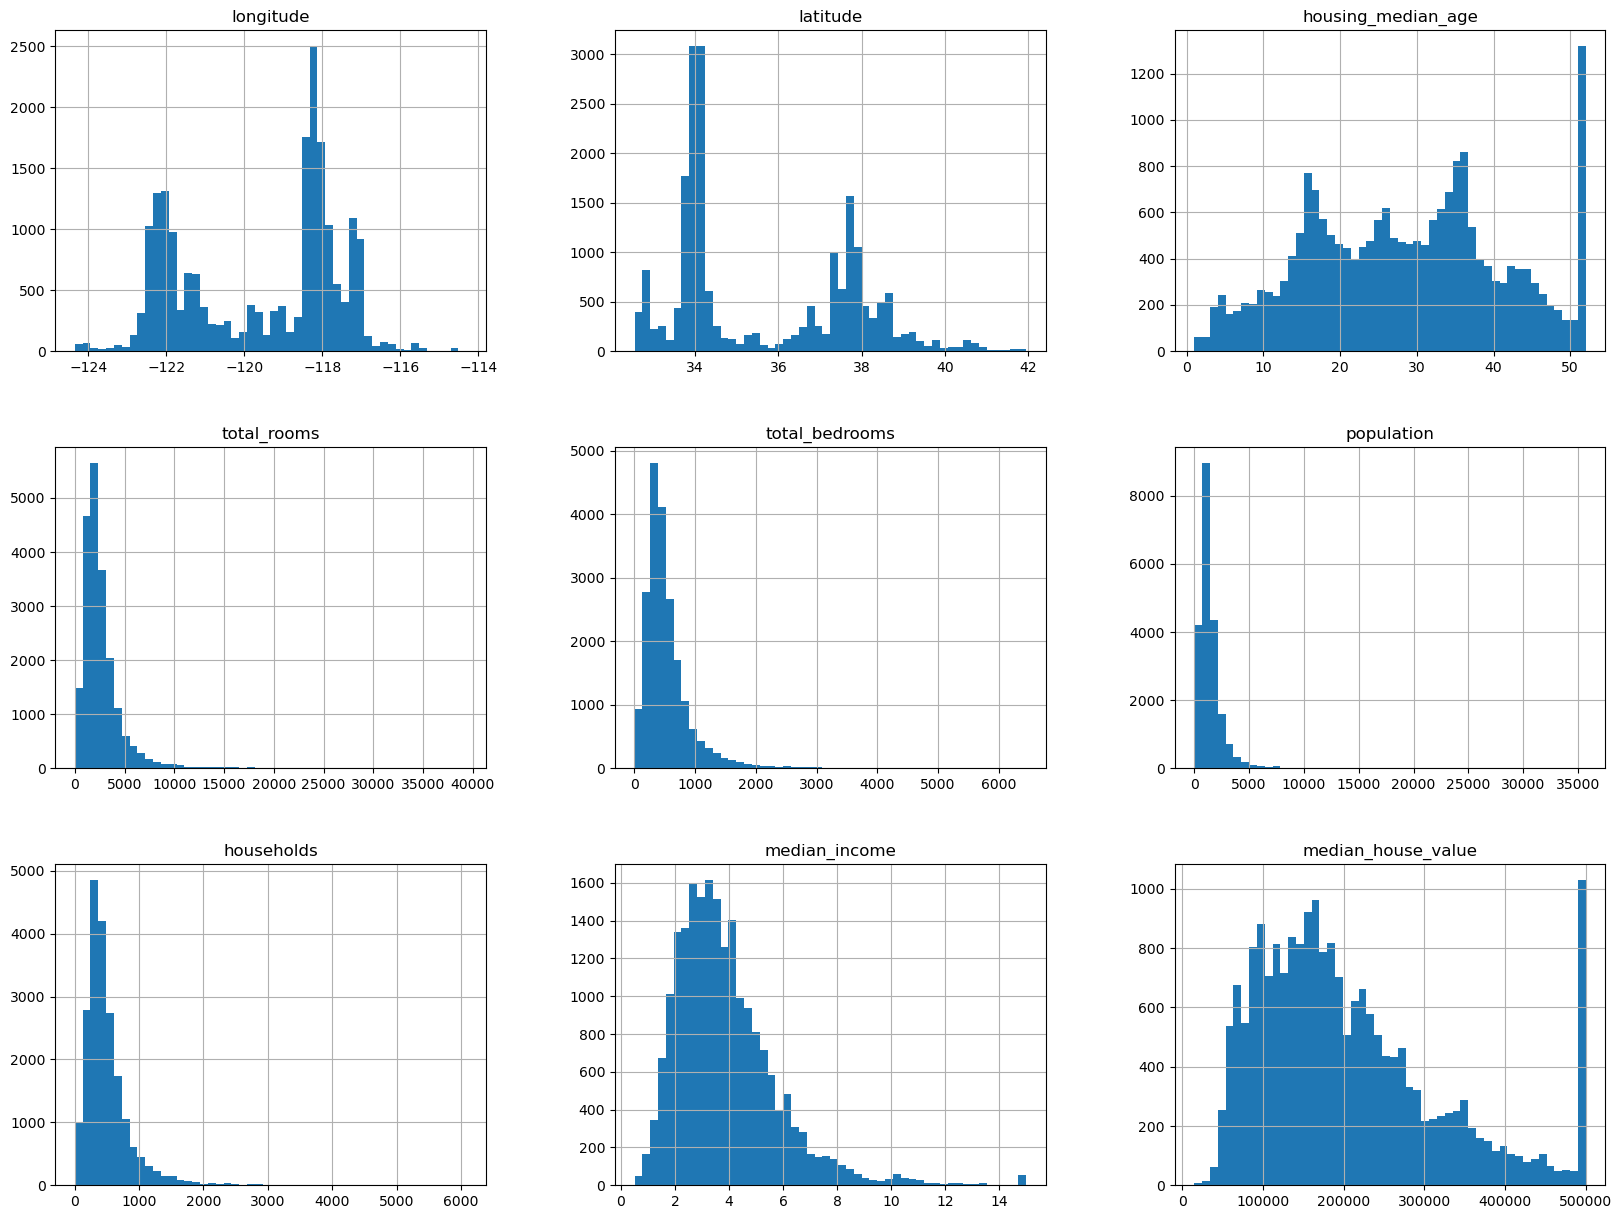

In [129]:
# Another quick way to get a feel of the type of data you are dealing with is to plot a
# histogram for each numerical attribute.
housing.hist(bins=50, figsize=(20,15))

<Axes: >

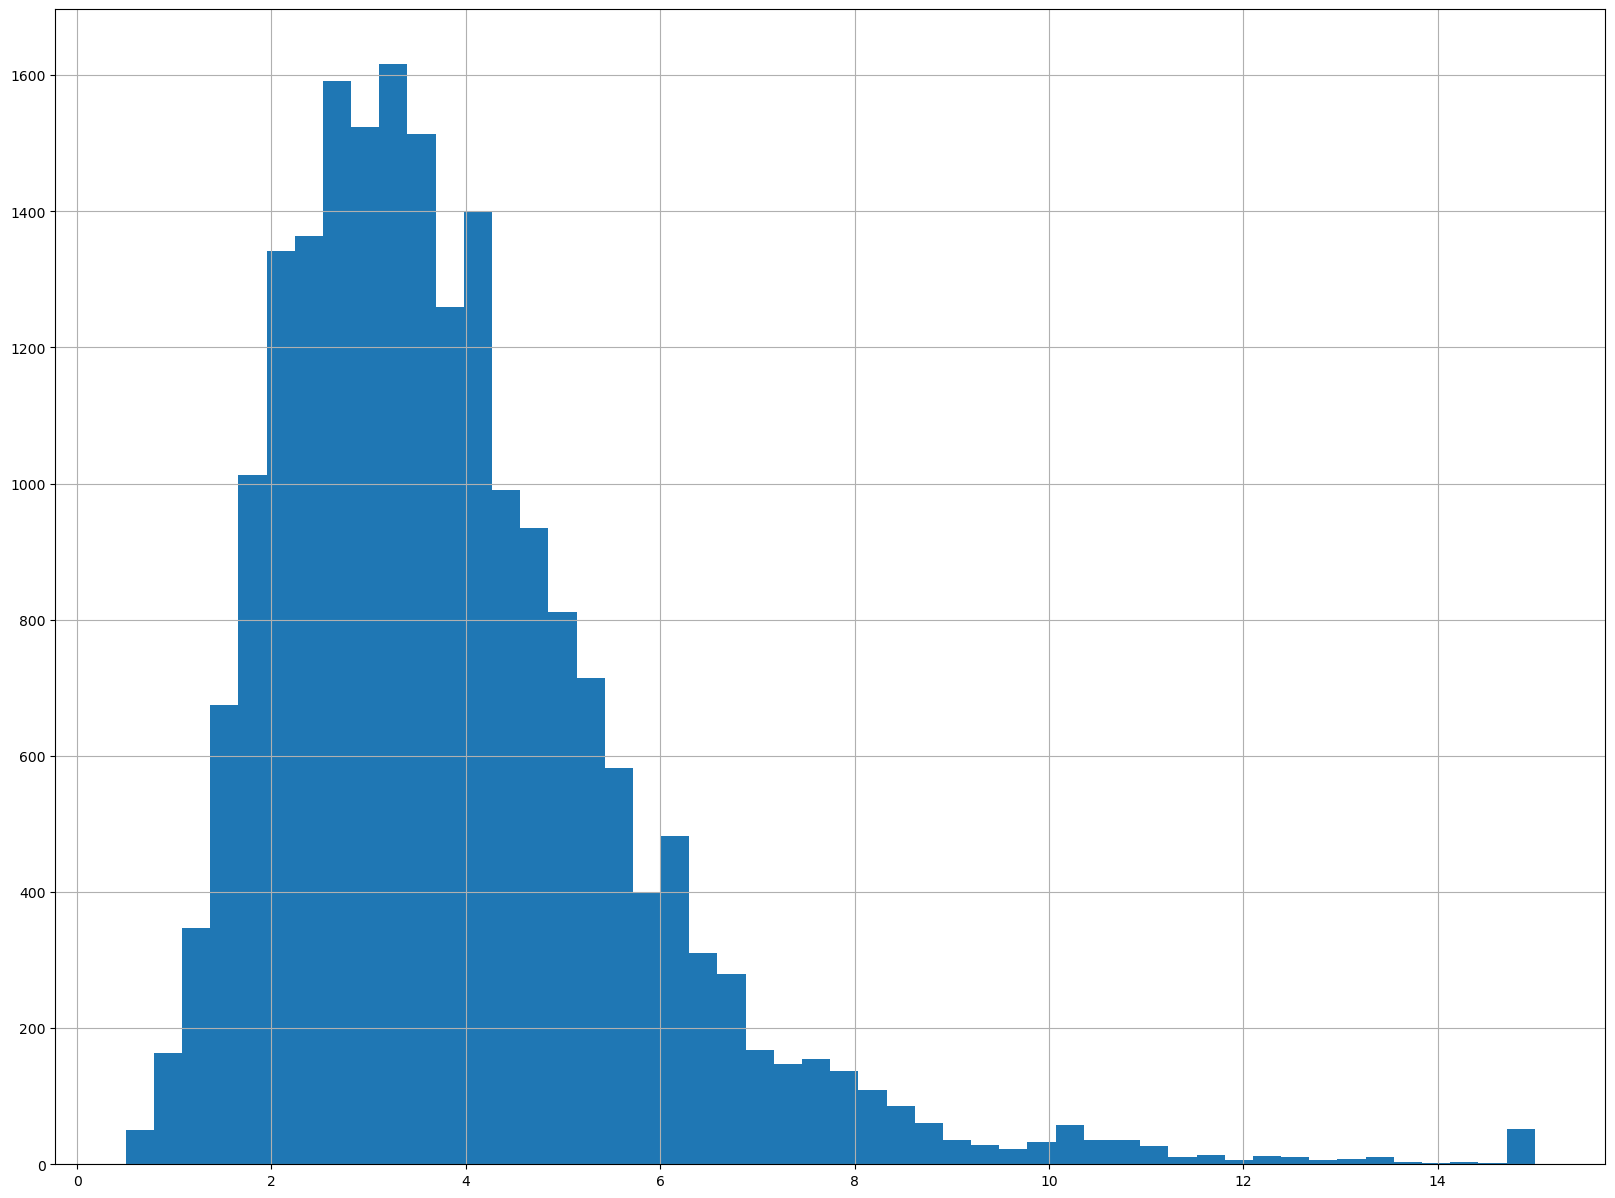

In [130]:
housing.median_income.hist(bins=50, figsize=(20,15))
# El atributo median_income está:
# Escalado:
#   - Los valores están divididos aproximadamente por 10.000.
#   - Ejemplos:
#       - 3   → ≈ $30,000
#       - 5   → ≈ $50,000
#       - 1.5 → ≈ $15,000
#
# Truncado (capped):
#   - Valores reales muy bajos o muy altos fueron recortados.
#   - Mínimo real ≈ 0.5 (≈ $5,000)
#       → Cualquier distrito con ingresos menores se ajustó a 0.5.
#   - Máximo real ≈ 15 (≈ $150,000)
#       → Cualquier distrito con ingresos mayores se ajustó a 15.
#
# Esto se hizo para evitar outliers extremos que puedan distorsionar los modelos.


<Axes: >

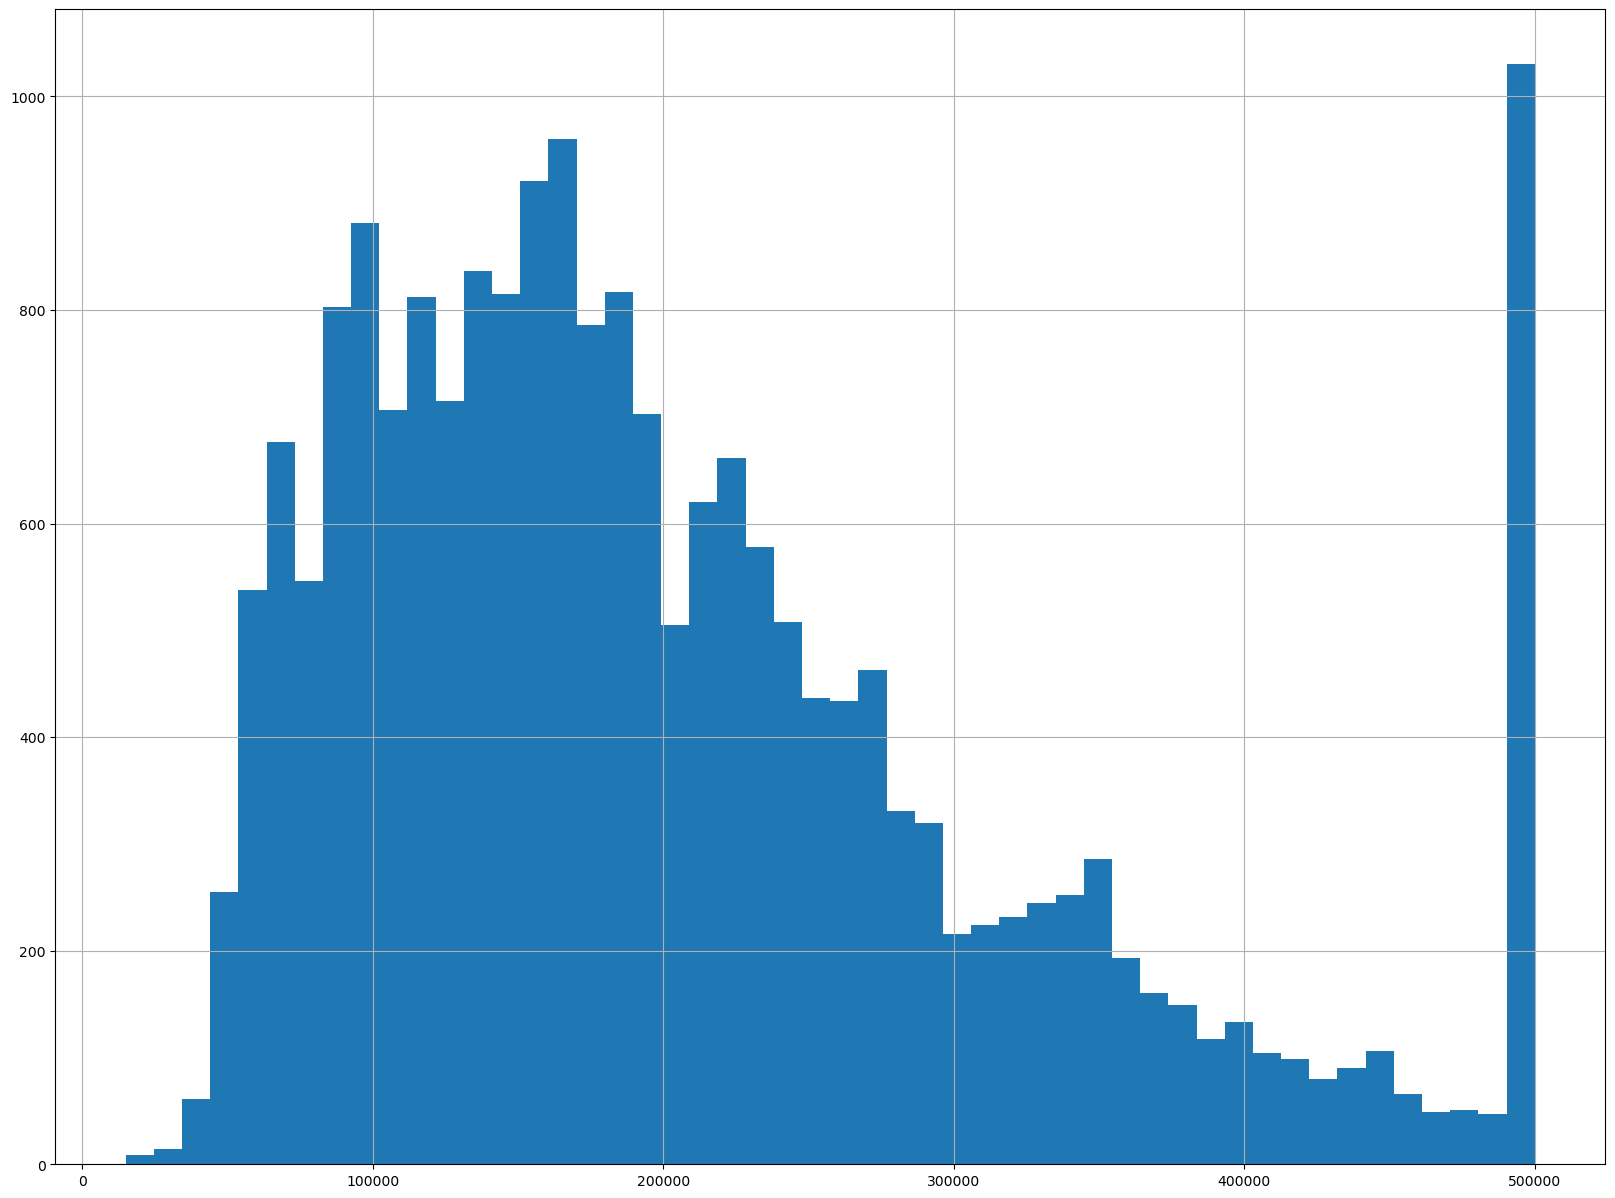

In [131]:
#housing.housing_median_age.hist(bins=50, figsize=(20,15))
housing.median_house_value.hist(bins=50, figsize=(20,15))


# Create a Test Set

In [132]:
# Test set es separar tus datos en un conjunto de entrenamiento (training set) y un conjunto de prueba (test set).

# El objetivo del test set es medir el rendimiento real de tu modelo una vez entrenado. Si solo evaluaras el modelo 
# con los mismos datos de entrenamiento, no sabrías si realmente está aprendiendo patrones generales o si simplemente está “memorizando”.

# Creating a test set is theoretically quite simple: just pick some instances randomly,
#typically 20% of the dataset (or less if your dataset is very large)

from sklearn.model_selection import train_test_split

# test_set contiene datos que realmente representan a toda la poblacion
#  stratified sampling: the population is divided into homogeneous subgroups called strata
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# len(test_set) len(train_set)

In [133]:
# Now you are ready to do stratified sampling based on the income category
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [134]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


# Discover and Visualize the Data to Gain Insights

<Axes: xlabel='longitude', ylabel='latitude'>

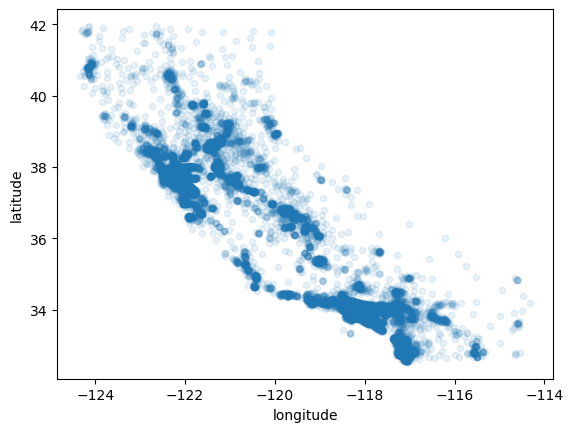

In [135]:
#housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#you can clearly see the high-density areas, namely the Bay
#Area and around Los Angeles and San Diego, plus a long line of fairly high density in
#the Central Valley, in particular around Sacramento and Fresno.

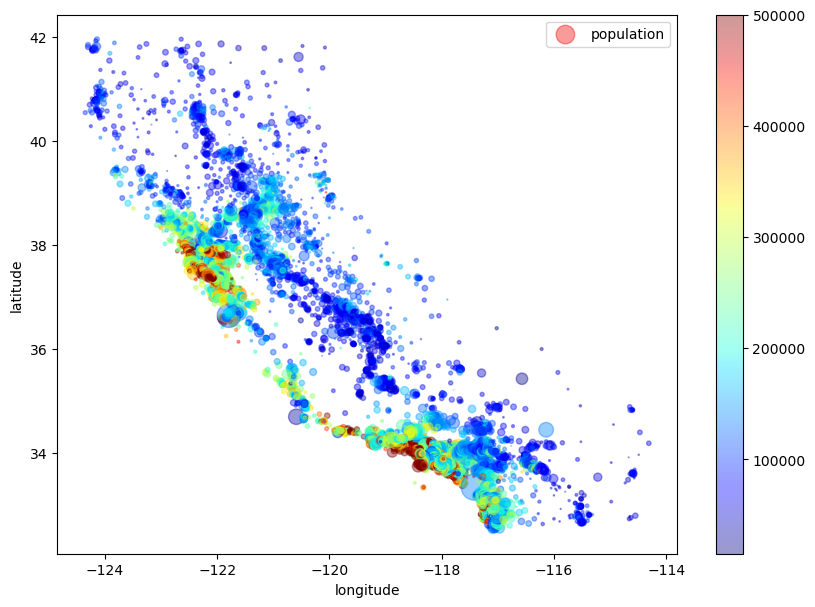

In [136]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing.population/100, label="population", figsize=(10, 7),
            c=housing.median_house_value, cmap=plt.get_cmap("jet"), colorbar=True
)

plt.legend()


# Looking for Correlations

In [137]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

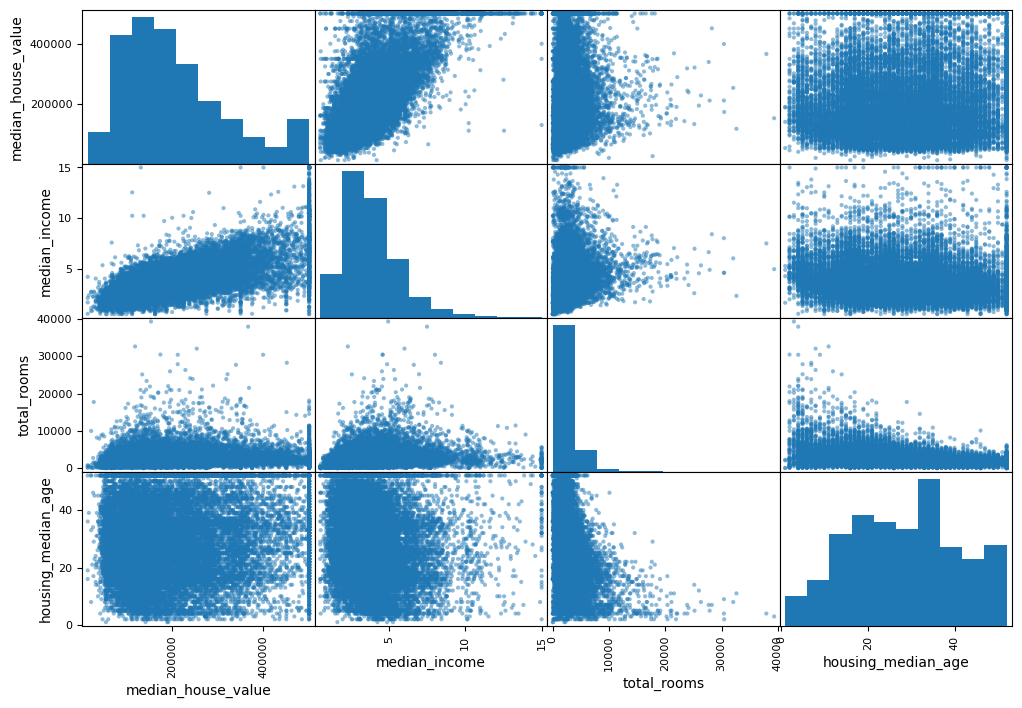

In [138]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

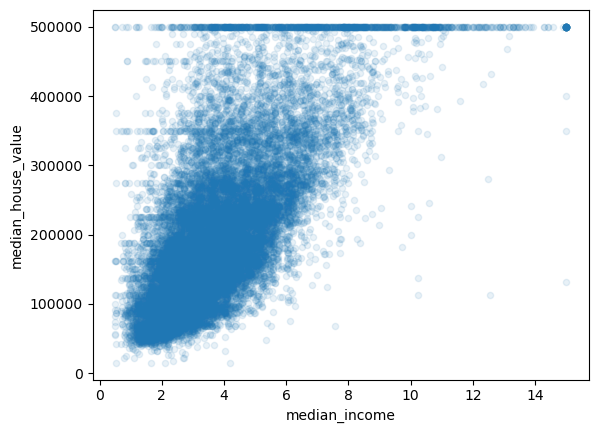

In [139]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

# Prepare the Data for Machine Learning Algorithms

In [140]:
# Separamos los datos de entrenamiento en:
# - 'housing': las características (predictoras) que usará el modelo para aprender.
# - 'housing_labels': la variable objetivo (median_house_value), que es lo que queremos predecir.
# Lo hacemos porque las características y la variable objetivo requieren transformaciones distintas,
# y el modelo necesita X e y por separado para entrenar correctamente.
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


## Data cleaning

In [141]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Custom Transformers

In [168]:
# You will want your transformer to work seamlessly with Scikit-Learn func‐ tionalities (such as pipelines),
# and since Scikit-Learn relies on duck typing (not inher‐ itance), all you need is to create a class and implement three methods: fit()
# (returning self), transform(), and fit_transform(). You can get the last one for free by simply adding TransformerMixin as a base class. 
# Also, if you add BaseEstima tor as a base class (and avoid *args and **kargs in your constructor) you will get two extra methods (get_params() and set_params())

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    def get_feature_names_out(self, input_features=None):
        base = list(input_features)
        
        extra = ["rooms_per_household", 
             "population_per_household"]
        
        if self.add_bedrooms_per_room:
            extra.append("bedrooms_per_room")
        
        return base + extra


# Feature Scaling

In [169]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("adder", CombinedAttributesAdder()),
    ("scaler", StandardScaler())
])


categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder())
])

#    


In [170]:
numerical_caracteristics = list(housing.drop("ocean_proximity", axis=1))
categorical_caracteristics = ["ocean_proximity"]


In [174]:
feature_pipeline = ColumnTransformer([
    ("numeric", numerical_pipeline, numerical_caracteristics),
    ("categorical", categorical_pipeline, categorical_caracteristics)
])

transformed = feature_pipeline.fit_transform(housing)

In [175]:
feature_pipeline.get_feature_names_out()

array(['numeric__longitude', 'numeric__latitude',
       'numeric__housing_median_age', 'numeric__total_rooms',
       'numeric__total_bedrooms', 'numeric__population',
       'numeric__households', 'numeric__median_income',
       'numeric__rooms_per_household',
       'numeric__population_per_household', 'numeric__bedrooms_per_room',
       'categorical__ocean_proximity_<1H OCEAN',
       'categorical__ocean_proximity_INLAND',
       'categorical__ocean_proximity_ISLAND',
       'categorical__ocean_proximity_NEAR BAY',
       'categorical__ocean_proximity_NEAR OCEAN'], dtype=object)

In [176]:
housing_transformed = pd.DataFrame(data=transformed, columns=feature_pipeline.get_feature_names_out())
housing_transformed

,numeric__longitude,numeric__latitude,numeric__housing_median_age,numeric__total_rooms,numeric__total_bedrooms,numeric__population,numeric__households,numeric__median_income,numeric__rooms_per_household,numeric__population_per_household,numeric__bedrooms_per_room,categorical__ocean_proximity_<1H OCEAN,categorical__ocean_proximity_INLAND,categorical__ocean_proximity_ISLAND,categorical__ocean_proximity_NEAR BAY,categorical__ocean_proximity_NEAR OCEAN
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.466353,-0.092580,-0.443846,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.050362,0.023024,-0.516065,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.509240,-0.037436,0.322869,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.328149,-0.059156,-0.457023,1.0,0.0,0.0,0.0,0.0
